# LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from encode import encode 
from preprocess import normalization 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models import Word2Vec
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


# DATA LOADING

In [2]:
df = pd.read_csv('amazon_movie_reviews.csv', index_col=0)

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_1133/1022827078.py:1: DtypeWarning: Columns (18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon_movie_reviews.csv', index_col=0)


In [3]:
text = df[['review_title', 'text']]
text.head()

,review_title,text
0,Five Stars,"Amazon, please buy the show! I'm hooked!"
1,Five Stars,My Kiddos LOVE this show!!
2,Some decent moments...but...,Annabella Sciorra did her character justice wi...
3,"Decent Depiction of Lower-Functioning Autism, ...",...there should be more of a range of characte...
4,What Love Is...,"...isn't always how you expect it to be, but w..."


In [4]:
df.shape

(1000000, 25)

# EXPLORATORY DATA ANALYSIS

In [6]:
df.columns.unique()

Index(['rating', 'review_title', 'text', 'images_x', 'asin', 'parent_asin',
       'user_id', 'timestamp', 'helpful_vote', 'verified_purchase',
       'main_category', 'movie_title', 'subtitle', 'average_rating',
       'rating_number', 'features', 'description', 'price', 'images_y',
       'videos', 'store', 'categories', 'details', 'bought_together',
       'author'],
      dtype='object')

In [5]:
# Checking for null values
df.isnull().sum()

rating                     0
review_title              70
text                      78
images_x                   0
asin                       0
parent_asin                0
user_id                    0
timestamp                  0
helpful_vote               0
verified_purchase          0
main_category           9351
movie_title           542292
subtitle              979884
average_rating            10
rating_number             10
features              542290
description           542290
price                 611251
images_y                   0
videos                     0
store                 610148
categories            542290
details                    0
bought_together      1000000
author                999882
dtype: int64

In [15]:
# Checking for duplicates in movie_title
df['movie_title'].duplicated().sum()

897379

In [16]:
# Checking for duplicates in review_title
df['review_title'].duplicated().sum()

498384

In [9]:
for column in df.columns:
    print(f'Unique values in {column} are: {df[column].nunique()}')

Unique values in rating are: 5
Unique values in review_title are: 501615
Unique values in text are: 828697
Unique values in images_x are: 1869
Unique values in asin are: 211352
Unique values in parent_asin are: 211342
Unique values in user_id are: 177374
Unique values in timestamp are: 992216
Unique values in helpful_vote are: 410
Unique values in verified_purchase are: 2
Unique values in main_category are: 25
Unique values in movie_title are: 102620
Unique values in subtitle are: 83
Unique values in average_rating are: 41
Unique values in rating_number are: 18561
Unique values in features are: 11749
Unique values in description are: 97177
Unique values in price are: 11962
Unique values in images_y are: 155417
Unique values in videos are: 11028
Unique values in store are: 71015
Unique values in categories are: 5884
Unique values in details are: 175306
Unique values in bought_together are: 0
Unique values in author are: 19


## Movies

There are 102620 unique movies.
There are 501615 unique reviews titles.
There at 828697 unique reviews.


In [7]:
df['movie_title'].value_counts()

The Age Of Adaline                                                                             971
Risen                                                                                          920
The Martian                                                                                    841
The Tomorrow War                                                                               814
The Man in the High Castle                                                                     584
                                                                                              ... 
Puccini: Turandot [Blu-ray]                                                                      1
Andy Statman: Learn to Play Klezmer Music - Improvising in the Tradition                         1
Apollo Chronicles                                                                                1
Twists and Advanced Turning                                                                      1
National G

In [3]:
#df[df['movie_title'] == 'Rocketman']


In [13]:
df['review_title'].value_counts()

Five Stars                                                                     159159
Four Stars                                                                      39955
Three Stars                                                                     18381
One Star                                                                         9057
Two Stars                                                                        7814
                                                                                ...  
A WASTE OF TIME                                                                     1
CAMPY TIMES 100                                                                     1
Great quality for DVD                                                               1
Best movie this husband and wife team has turned out--at least my favorite!         1
weak. very weak                                                                     1
Name: review_title, Length: 501615, dtype: int64

In [14]:
df['text'].value_counts()

Great movie                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  5185
Good movie                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   3818
Grea

In [4]:
#df.groupby('movie_title').size().sort_values(ascending=False)

## Movie Categories

In [17]:
df['categories'].value_counts()

['Movies & TV', 'Blu-ray', 'Movies']                                                                  49288
['Movies & TV', 'Studio Specials', 'Sony Pictures Home Entertainment', 'All Sony Pictures Titles']    23002
['Movies & TV', 'Genre for Featured Categories', 'Drama']                                             14231
['Movies & TV', 'Studio Specials', 'Warner Home Video', 'All Titles']                                 13974
['Movies & TV', 'Genre for Featured Categories', 'Action & Adventure']                                13736
                                                                                                      ...  
['Western', 'Military and War', 'Joyous', 'Outlandish']                                                   1
['Comedy', 'Animation', 'Fantasy', 'Romance']                                                             1
['Documentary', 'International', 'Special Interest']                                                      1
['Drama', 'Faith and Spiritu

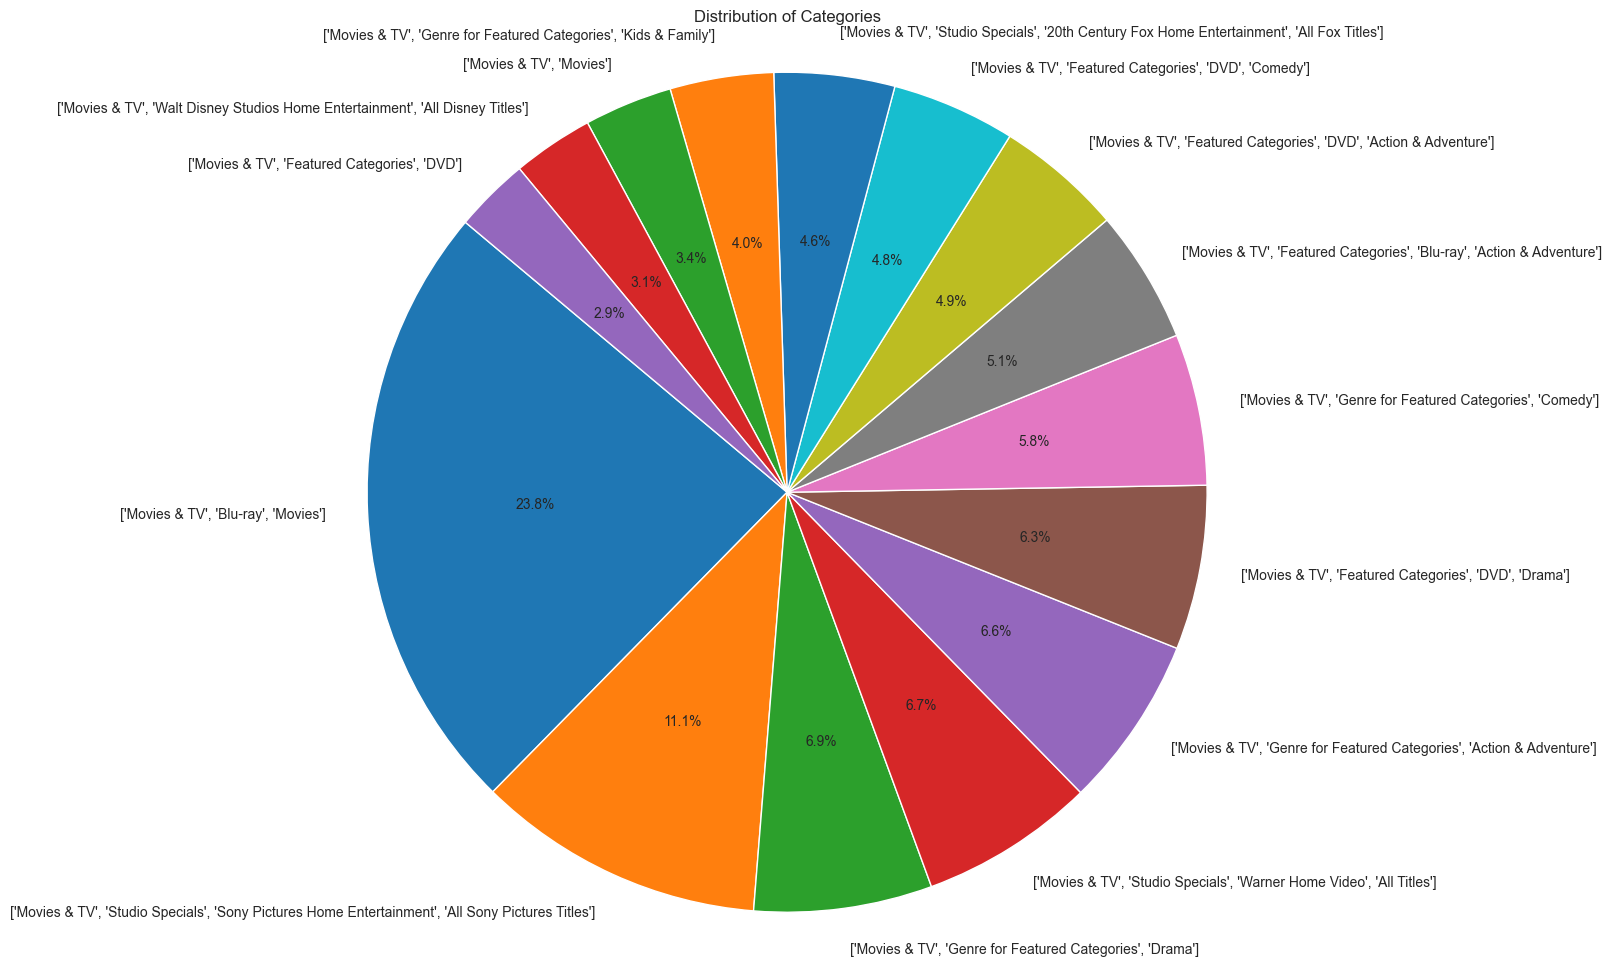

In [5]:
# Count the occurrences of each category
category_counts = df['categories'].value_counts()
# Select the top 15 categories
top_categories = category_counts.head(15)

# Plot a pie chart
plt.figure(figsize=(20, 12))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.ylabel('')  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


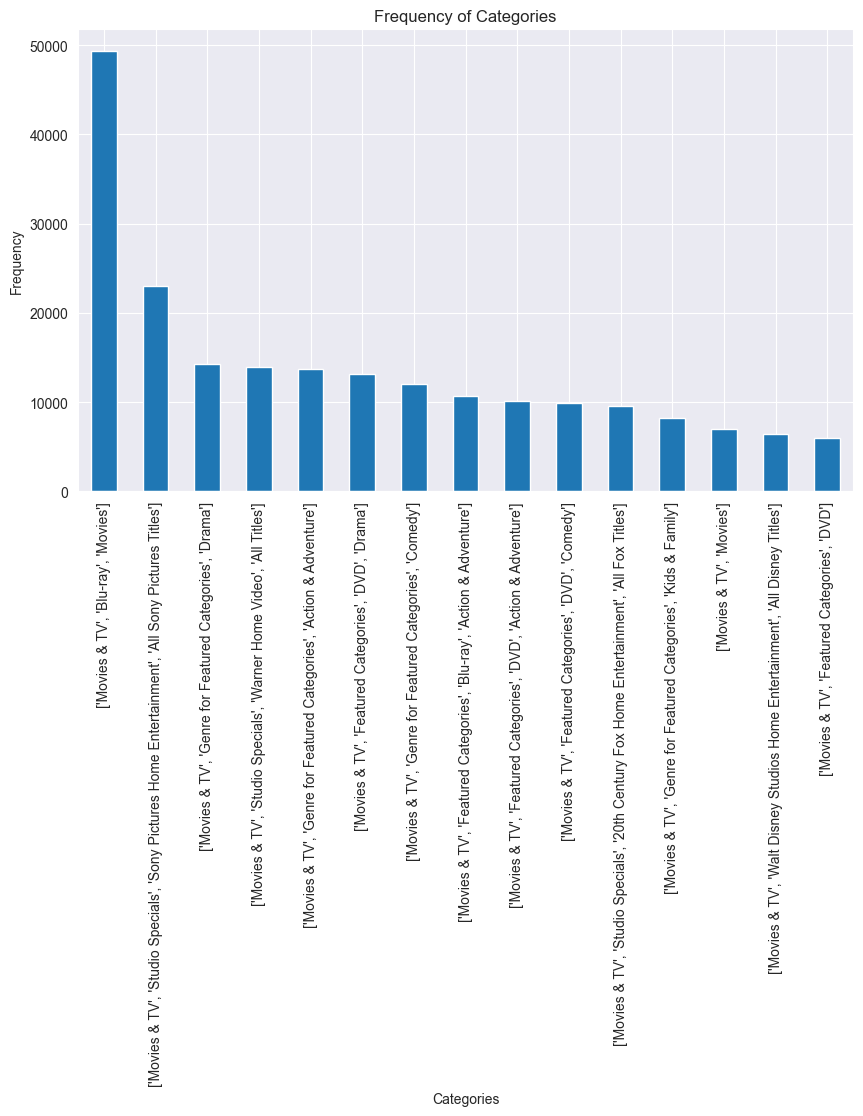

In [20]:
# plot frequency of categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()


## Movies with most reviews

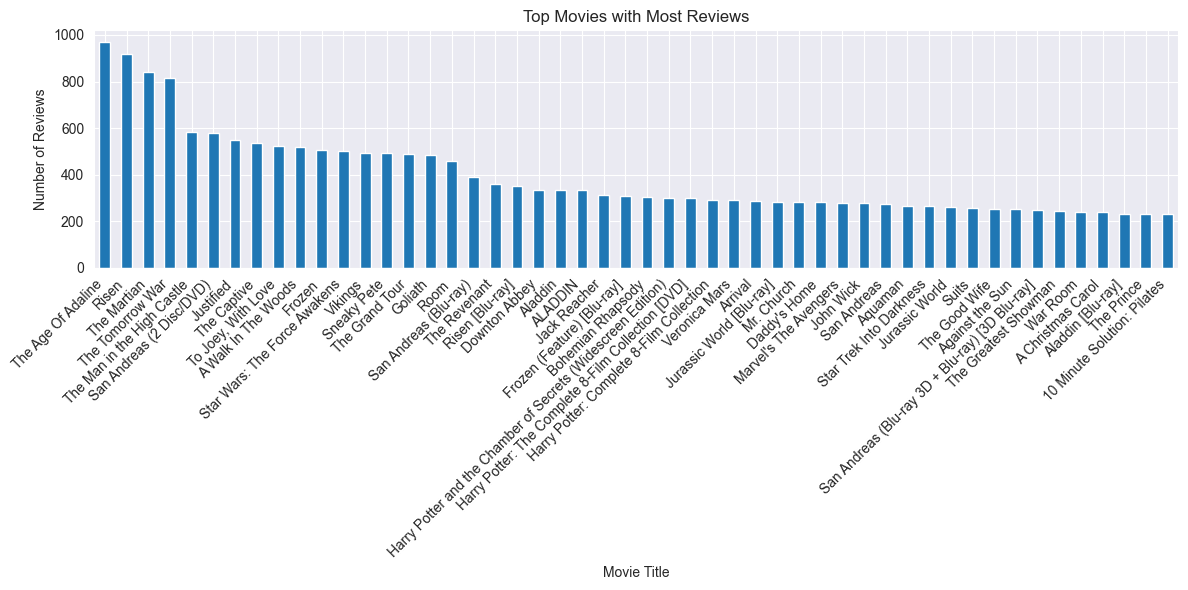

In [23]:
# Group the DataFrame by 'movie_title' and count the number of reviews for each movie
movie_review_counts = df.groupby('movie_title').size()

# Sort the movies based on the number of reviews in descending order
sorted_movies = movie_review_counts.sort_values(ascending=False)

# Select the top N movies with the most reviews (e.g., top 10)
top_movies = sorted_movies.head(50)

# Plot the top movies and their review counts
plt.figure(figsize=(12, 6))
top_movies.plot(kind='bar')
plt.title('Top Movies with Most Reviews')
plt.xlabel('Movie Title')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




## Movies with highest rating count

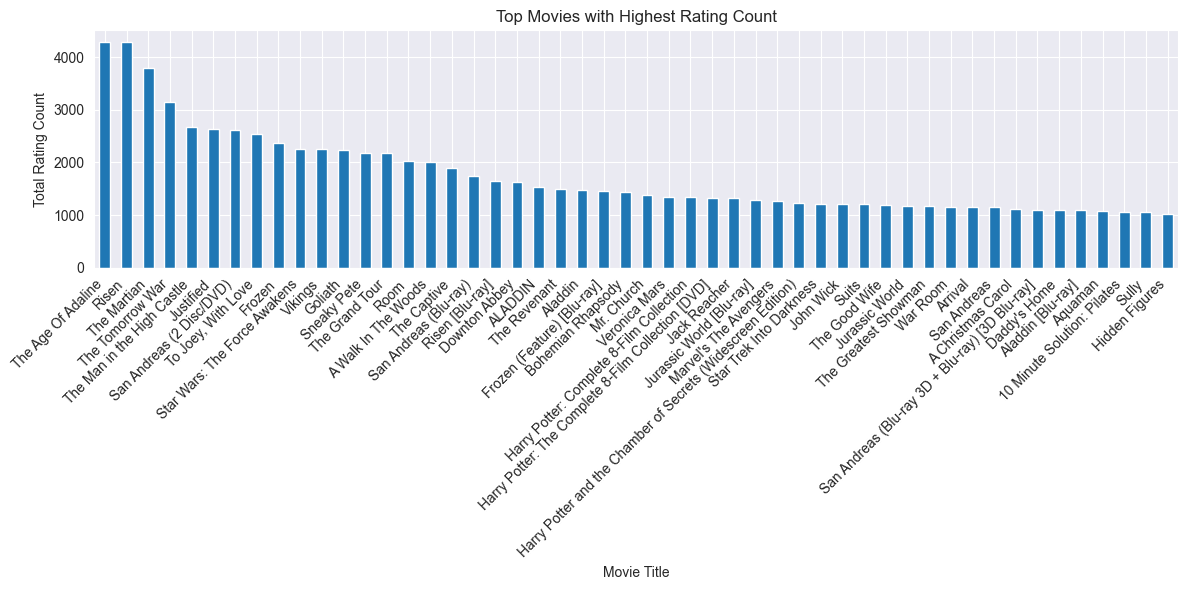

In [24]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'movie_title' and sum up the ratings for each movie
movie_rating_counts = df.groupby('movie_title')['rating'].sum()

# Sort the movies based on the total rating count in descending order
sorted_movies = movie_rating_counts.sort_values(ascending=False)

# Select the top N movies with the highest rating count (e.g., top 10)
top_movies = sorted_movies.head(50)

# Plot the top movies and their total rating counts
plt.figure(figsize=(12, 6))
top_movies.plot(kind='bar')
plt.title('Top Movies with Highest Rating Count')
plt.xlabel('Movie Title')
plt.ylabel('Total Rating Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Movies with ratingCount and start_rating

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_15237/3243717237.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


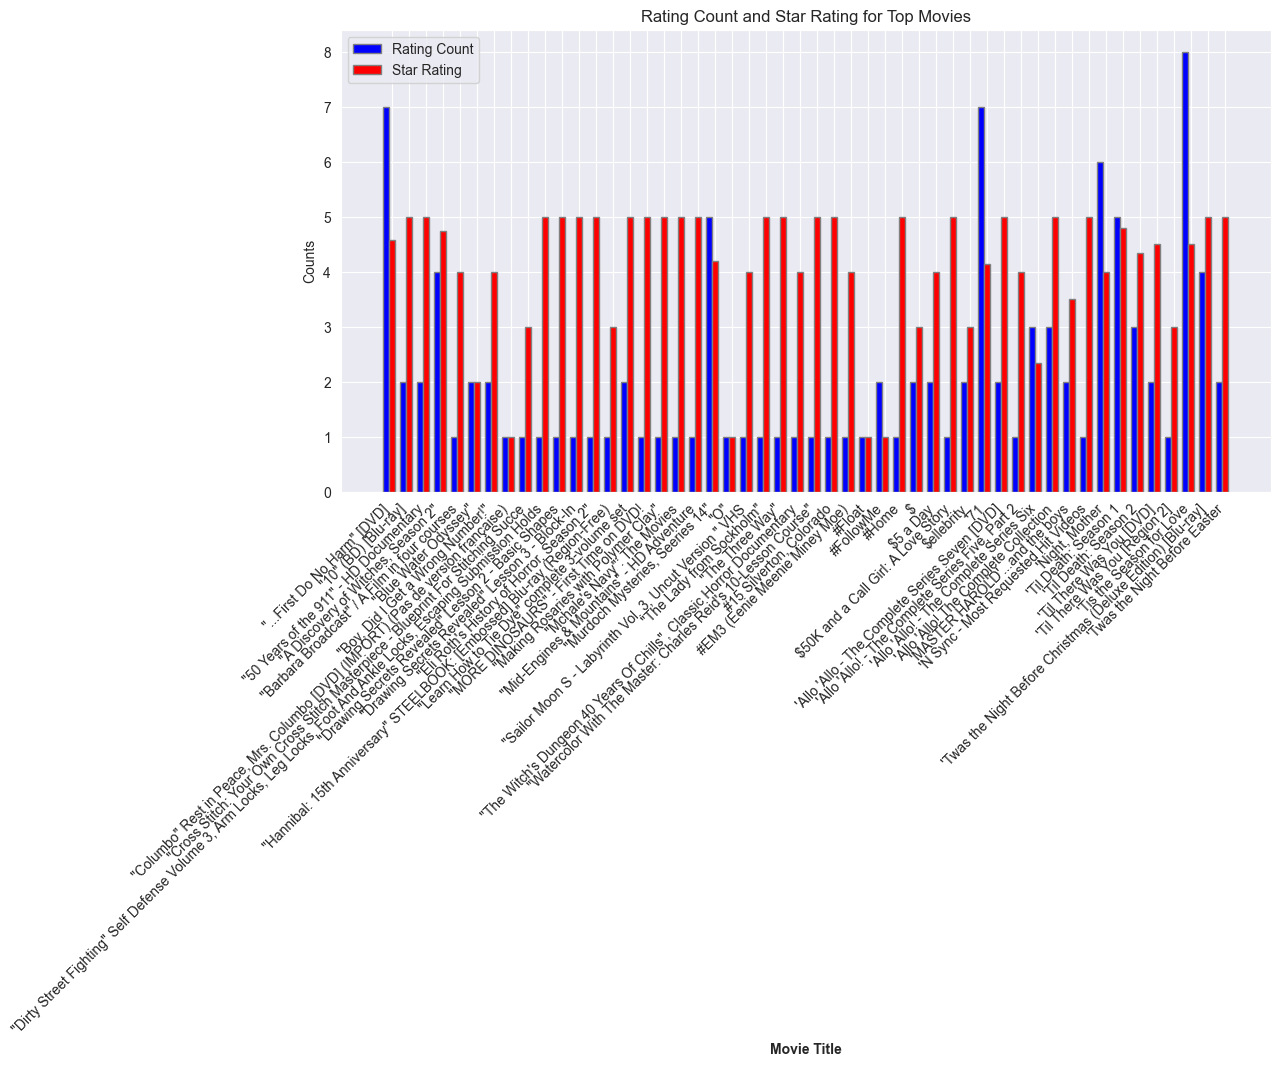

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Group the DataFrame by 'movie_title' and calculate the total rating count and average star rating for each movie
movie_stats = df.groupby('movie_title').agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
movie_stats.columns = ['ratingCount', 'starRating']

# Select the top N movies (optional)
top_movies = movie_stats.head(50)

# Create an array for the movie titles
movie_titles = top_movies.index

# Create an array for the rating counts and star ratings
rating_counts = top_movies['ratingCount']
star_ratings = top_movies['starRating']

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(movie_titles))
r2 = [x + bar_width for x in r1]

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, rating_counts, color='b', width=bar_width, edgecolor='grey', label='Rating Count')
plt.bar(r2, star_ratings, color='r', width=bar_width, edgecolor='grey', label='Star Rating')

# Add labels and title
plt.xlabel('Movie Title', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(movie_titles))], movie_titles, rotation=45, ha='right')
plt.ylabel('Counts')
plt.title('Rating Count and Star Rating for Top Movies')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## Movies with helpful votes and total votes

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_15237/78983295.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


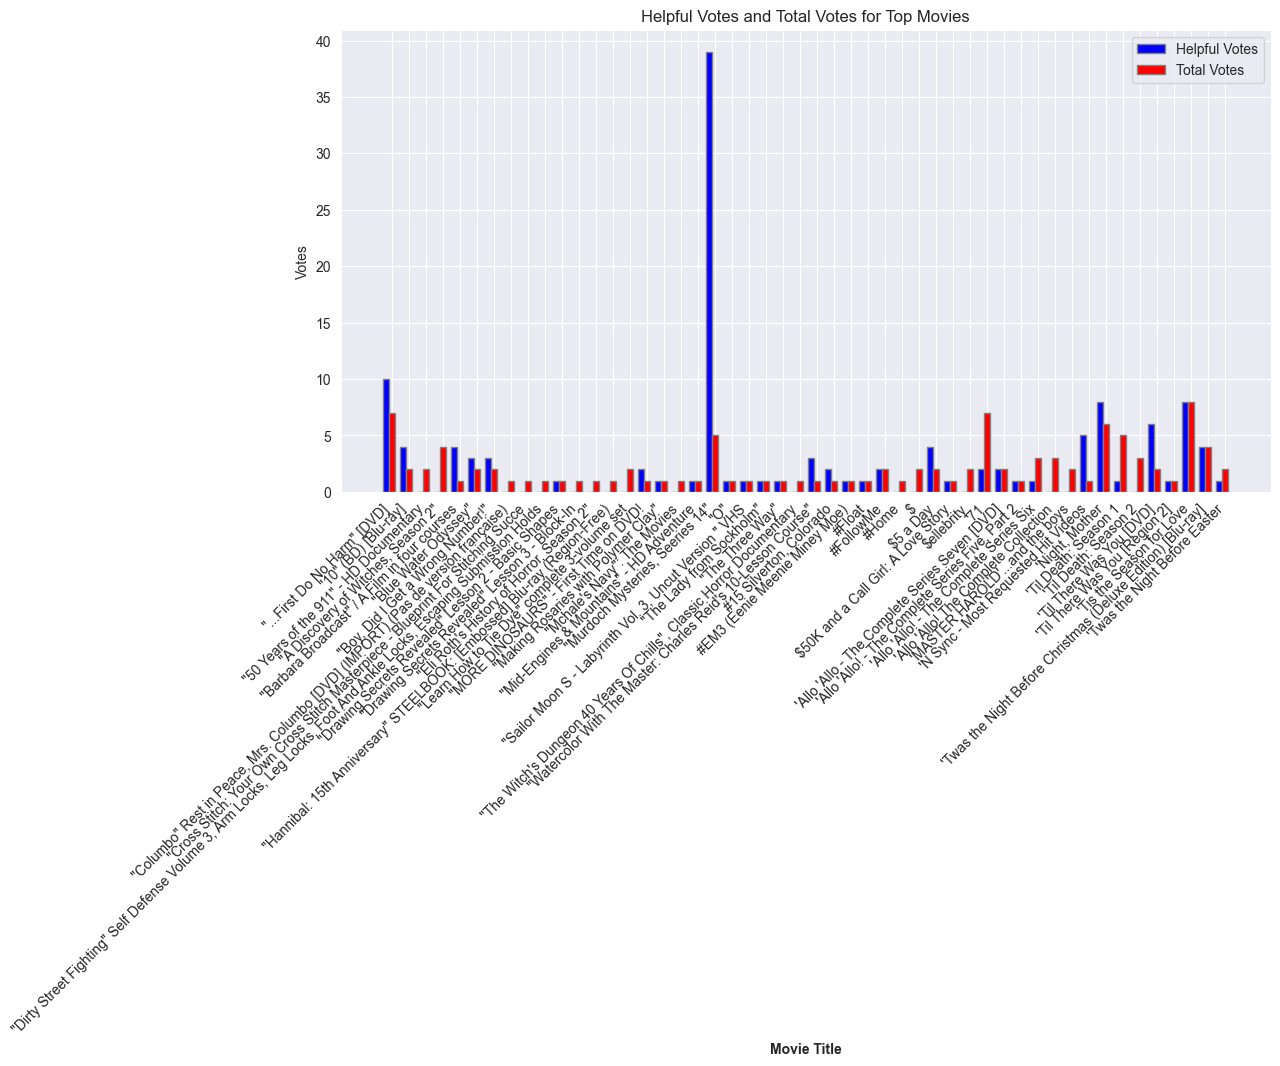

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Group the DataFrame by 'movie_title' and calculate the total helpful votes and total votes for each movie
movie_votes = df.groupby('movie_title').agg({'helpful_vote': 'sum', 'rating': 'count'})

# Rename the columns for clarity
movie_votes.columns = ['helpfulVotes', 'totalVotes']

# Select the top N movies (optional)
top_movies = movie_votes.head(50)

# Create an array for the movie titles
movie_titles = top_movies.index

# Create an array for the helpful votes and total votes
helpful_votes = top_movies['helpfulVotes']
total_votes = top_movies['totalVotes']

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(movie_titles))
r2 = [x + bar_width for x in r1]

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, helpful_votes, color='b', width=bar_width, edgecolor='grey', label='Helpful Votes')
plt.bar(r2, total_votes, color='r', width=bar_width, edgecolor='grey', label='Total Votes')

# Add labels and title
plt.xlabel('Movie Title', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(movie_titles))], movie_titles, rotation=45, ha='right')
plt.ylabel('Votes')
plt.title('Helpful Votes and Total Votes for Top Movies')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## Movie Categories with Highest and Lowest Star Rating

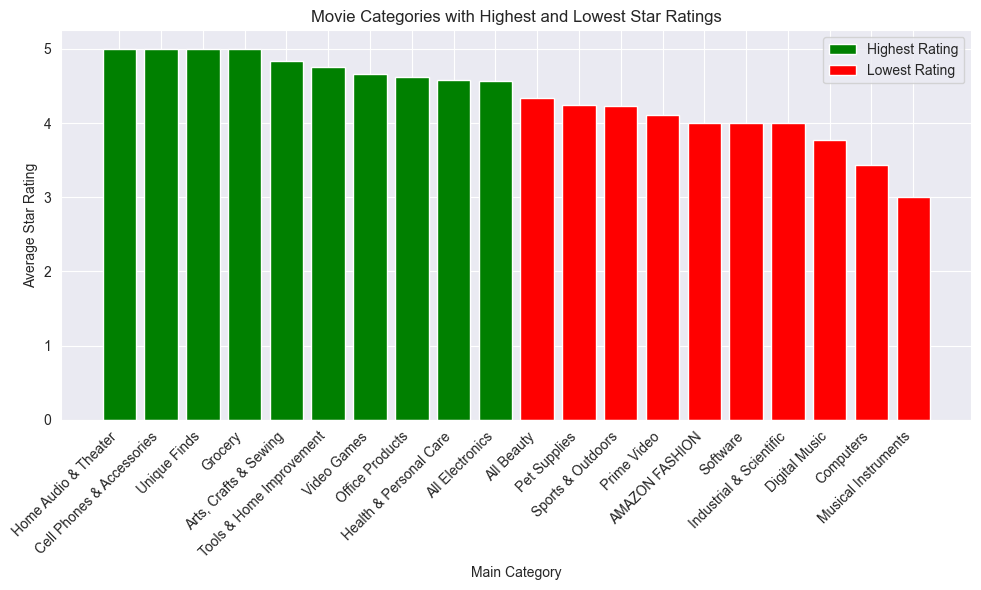

In [33]:
# Group the DataFrame by 'main_category' and calculate the average star rating for each category
category_star_ratings = df.groupby('main_category')['rating'].mean()

# Sort the categories based on the average star rating
sorted_categories = category_star_ratings.sort_values(ascending=False)

# Select the category with the highest star rating
highest_category = sorted_categories.head(10)

# Select the category with the lowest star rating
lowest_category = sorted_categories.tail(10)

# Plot the highest and lowest categories
plt.figure(figsize=(10, 6))
plt.bar(highest_category.index, highest_category.values, color='green', label='Highest Rating')
plt.bar(lowest_category.index, lowest_category.values, color='red', label='Lowest Rating')

# Add labels and title
plt.xlabel('Main Category')
plt.ylabel('Average Star Rating')
plt.title('Movie Categories with Highest and Lowest Star Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# DATA TRIMMING

## Unique Review Texts (828696)

In [5]:
reviews = df['text'].drop_duplicates().reset_index(drop=True).to_frame()
reviews.head()

,text
0,"Amazon, please buy the show! I'm hooked!"
1,My Kiddos LOVE this show!!
2,Annabella Sciorra did her character justice wi...
3,...there should be more of a range of characte...
4,"...isn't always how you expect it to be, but w..."


In [6]:
reviews.dropna(inplace=True)

In [7]:
reviews['text'] = reviews['text'].fillna('')
reviews['normalized_text']= reviews['text'].apply(lambda x: normalization(x))
reviews.head()

,text,normalized_text
0,"Amazon, please buy the show! I'm hooked!",amazon please buy show hooked
1,My Kiddos LOVE this show!!,kiddos love show
2,Annabella Sciorra did her character justice wi...,annabella sciorra character justice portrayal ...
3,...there should be more of a range of characte...,range character highfunctioning autism jack cl...
4,"...isn't always how you expect it to be, but w...",always expect know movie deep struggle within ...


In [8]:
# finding maximum length of clean-reviews rows
max_len = max(reviews['normalized_text'].apply(lambda x: len(x.split())))
print("Maximum length of clean-reviews rows:", max_len)
min_len = min(reviews['normalized_text'].apply(lambda x: len(x.split())))
print("Minimum length of clean-reviews rows:", min_len)

Maximum length of clean-reviews rows: 3459
Minimum length of clean-reviews rows: 0


In [11]:
zero_length_reviews = reviews[reviews['normalized_text'] == 0]
reviews = reviews.drop(zero_length_reviews.index)

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828697 entries, 0 to 828697
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   text             828697 non-null  object
 1   normalized_text  828697 non-null  object
dtypes: object(2)
memory usage: 19.0+ MB


In [46]:
# length_counts = reviews['text_length'].value_counts()
# length_counts.head(3459)


4       57020
3       53317
5       48965
6       42330
2       40917
        ...  
805         1
947         1
870         1
1179        1
878         1
Name: text_length, Length: 999, dtype: int64

In [20]:
#reviews100 = reviews[reviews['normalized_text'].apply(lambda x: len(x.split())) < 100]
reviews10 = reviews[reviews['normalized_text'].apply(lambda x: len(x.split())) < 10]
reviews10.shape

(355839, 2)

# PRE-PROCESSING

## Normalization

In [3]:
df['text'] = df['text'].fillna('')
df['review_title'] = df['review_title'].fillna('')

In [4]:
df['clean_reviews']= df['text'].apply(lambda x: normalization(x))
df['clean_titles'] = df['review_title'].apply(lambda x: normalization(x))

In [5]:
df['clean_reviews'].head(1)

0    amazon please buy show hooked
Name: clean_reviews, dtype: object

In [87]:
# finding maximum length of clean-reviews rows
max_len = max(df['clean_reviews'].apply(lambda x: len(x.split())))
print("Maximum length of clean-reviews rows:", max_len)
min_len = min(df['clean_reviews'].apply(lambda x: len(x.split())))
print("Minimum length of clean-reviews rows:", min_len)

Maximum length of clean-reviews rows: 3459
Minimum length of clean-reviews rows: 0


## Encoding (Word2Vec)

## Train the model

In [21]:
reviews10.head(1)

,text,normalized_text
0,"Amazon, please buy the show! I'm hooked!",amazon please buy show hooked


In [23]:
tokenized_text = [word_tokenize(text) for text in reviews10['normalized_text']]

In [28]:
tokenized_text[5]

['amazing', 'love', 'story', 'documentary']

In [24]:
len(tokenized_text)

355839

In [60]:
reviews10['tokens'] = tokenized_text
reviews10.head(5)

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_1133/3963654387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews10['tokens'] = tokenized_text


,text,normalized_text,tokens
0,"Amazon, please buy the show! I'm hooked!",amazon please buy show hooked,"[amazon, please, buy, show, hooked]"
1,My Kiddos LOVE this show!!,kiddos love show,"[kiddos, love, show]"
7,Great film all around. Some films about Jesus ...,great film around film jesus rough legit,"[great, film, around, film, jesus, rough, legit]"
8,Great movie! My kids are obsessed with HP!,great movie kid obsessed hp,"[great, movie, kid, obsessed, hp]"
9,LOVE this movie! Hits you in the feels!,love movie hit feel,"[love, movie, hit, feel]"


In [71]:
empty_list_count = 0

for tokens_list in reviews10['tokens'].apply(lambda x: [] if not x else x):
    if not tokens_list:
        empty_list_count += 1
        #print("Empty list found!")
        
print("Total number of empty lists:", empty_list_count)


Total number of empty lists: 634


In [73]:
empty_list_rows = reviews10[reviews10['tokens'].apply(lambda x: not x)] # Select rows with empty lists
empty_list_rows.head(20)

,text,normalized_text,tokens
456,Don't!!!!!,,[]
1756,.,,[]
2940,SO - SO,,[]
3917,😊,,[]
4229,A+,,[]
4350,: ),,[]
4892,not all that,,[]
4917,80'S,,[]
5046,Just had to own it!,,[]
5050,Just had to own it!!!,,[]


In [74]:
reviews10.drop(reviews10[reviews10['tokens'].apply(lambda x: x == [])].index, inplace=True)

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_1133/2384013483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews10.drop(reviews10[reviews10['tokens'].apply(lambda x: x == [])].index, inplace=True)


In [75]:
empty_list_count = 0

for tokens_list in reviews10['tokens'].apply(lambda x: [] if not x else x):
    if not tokens_list:
        empty_list_count += 1
        #print("Empty list found!")
        
print("Total number of empty lists:", empty_list_count)

Total number of empty lists: 0


In [30]:
# Build vocabulary
vocabulary = set()
for token in tokenized_text:
    vocabulary.update(token)

# Train Word2Vec model
word2vec10 = Word2Vec(sentences=tokenized_text, vector_size=10, window=5, min_count=1, workers=4)
# Save the trained model
word2vec10.save("word2vec10.bin")


In [130]:
print(len(vocabulary))

47182


In [32]:
# load the trained model
word2vec10 = Word2Vec.load("word2vec10.bin")

In [ ]:
tokenized_text = [word_tokenize(text) for text in reviews10['normalized_text']]


In [76]:
reviews10.head()

,text,normalized_text,tokens
0,"Amazon, please buy the show! I'm hooked!",amazon please buy show hooked,"[amazon, please, buy, show, hooked]"
1,My Kiddos LOVE this show!!,kiddos love show,"[kiddos, love, show]"
7,Great film all around. Some films about Jesus ...,great film around film jesus rough legit,"[great, film, around, film, jesus, rough, legit]"
8,Great movie! My kids are obsessed with HP!,great movie kid obsessed hp,"[great, movie, kid, obsessed, hp]"
9,LOVE this movie! Hits you in the feels!,love movie hit feel,"[love, movie, hit, feel]"


In [77]:
embeddings = [word2vec10.wv[tokens_list] for tokens_list in reviews10['tokens']]


In [78]:
reviews10['review_embedding'] = embeddings
reviews10.head(5)

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_1133/81265633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews10['review_embedding'] = embeddings


,text,normalized_text,tokens,review_embedding
0,"Amazon, please buy the show! I'm hooked!",amazon please buy show hooked,"[amazon, please, buy, show, hooked]","[[-0.6724912, -3.3670754, 2.250035, 1.6737664,..."
1,My Kiddos LOVE this show!!,kiddos love show,"[kiddos, love, show]","[[-0.3144846, -0.2690578, 2.2325037, -0.445754..."
7,Great film all around. Some films about Jesus ...,great film around film jesus rough legit,"[great, film, around, film, jesus, rough, legit]","[[0.023877876, 1.3585275, 2.5909383, 0.2565376..."
8,Great movie! My kids are obsessed with HP!,great movie kid obsessed hp,"[great, movie, kid, obsessed, hp]","[[0.023877876, 1.3585275, 2.5909383, 0.2565376..."
9,LOVE this movie! Hits you in the feels!,love movie hit feel,"[love, movie, hit, feel]","[[-1.6646494, 1.4232593, 4.111296, 0.6904047, ..."


# SENTIMENTS


## VADER Sentiment Analysis (Valence Aware Dictionary and sEntiment Reasoner)

In [79]:
# Create a SentimentIntensityAnalyzer object
vader = SentimentIntensityAnalyzer()
# df['headline_score'] = df['clean_titles'].apply(lambda review: vader.polarity_scores(review))
# df['body_score'] = df['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
reviews10['sentiment_score'] = reviews10['normalized_text'].apply(lambda review: vader.polarity_scores(review))


/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_1133/2000585405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews10['sentiment_score'] = reviews10['normalized_text'].apply(lambda review: vader.polarity_scores(review))


In [80]:
reviews10.head(5)

,text,normalized_text,tokens,review_embedding,sentiment_score
0,"Amazon, please buy the show! I'm hooked!",amazon please buy show hooked,"[amazon, please, buy, show, hooked]","[[-0.6724912, -3.3670754, 2.250035, 1.6737664,...","{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp..."
1,My Kiddos LOVE this show!!,kiddos love show,"[kiddos, love, show]","[[-0.3144846, -0.2690578, 2.2325037, -0.445754...","{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
7,Great film all around. Some films about Jesus ...,great film around film jesus rough legit,"[great, film, around, film, jesus, rough, legit]","[[0.023877876, 1.3585275, 2.5909383, 0.2565376...","{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp..."
8,Great movie! My kids are obsessed with HP!,great movie kid obsessed hp,"[great, movie, kid, obsessed, hp]","[[0.023877876, 1.3585275, 2.5909383, 0.2565376...","{'neg': 0.193, 'neu': 0.341, 'pos': 0.466, 'co..."
9,LOVE this movie! Hits you in the feels!,love movie hit feel,"[love, movie, hit, feel]","[[-1.6646494, 1.4232593, 4.111296, 0.6904047, ...","{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp..."


## Converting the scores into sentiments

In [81]:
#Converting Compounds values into Sentiments
def converting_compound_to_sentiments(compound_list) :
    sentiment_list = []
    
    for compound in compound_list:
        if compound >= 0.05 :
            sentiment_list.append(1) # positive
        elif compound <= -0.05 :
            sentiment_list.append(-1) # negative
        else:
            sentiment_list.append(0) # neutral
    
    return sentiment_list[0]


In [82]:
# Apply converting_compound_to_sentiments function to sentiment_score column
reviews10['sentiments'] = reviews10['sentiment_score'].apply(lambda x: converting_compound_to_sentiments([x['compound']]))
reviews10.head(5)

/var/folders/9g/y_c7n71j1h7_qfrssnpsr4pc0000gn/T/ipykernel_1133/2703087536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews10['sentiments'] = reviews10['sentiment_score'].apply(lambda x: converting_compound_to_sentiments([x['compound']]))


,text,normalized_text,tokens,review_embedding,sentiment_score,sentiments
0,"Amazon, please buy the show! I'm hooked!",amazon please buy show hooked,"[amazon, please, buy, show, hooked]","[[-0.6724912, -3.3670754, 2.250035, 1.6737664,...","{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp...",1
1,My Kiddos LOVE this show!!,kiddos love show,"[kiddos, love, show]","[[-0.3144846, -0.2690578, 2.2325037, -0.445754...","{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",1
7,Great film all around. Some films about Jesus ...,great film around film jesus rough legit,"[great, film, around, film, jesus, rough, legit]","[[0.023877876, 1.3585275, 2.5909383, 0.2565376...","{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",1
8,Great movie! My kids are obsessed with HP!,great movie kid obsessed hp,"[great, movie, kid, obsessed, hp]","[[0.023877876, 1.3585275, 2.5909383, 0.2565376...","{'neg': 0.193, 'neu': 0.341, 'pos': 0.466, 'co...",1
9,LOVE this movie! Hits you in the feels!,love movie hit feel,"[love, movie, hit, feel]","[[-1.6646494, 1.4232593, 4.111296, 0.6904047, ...","{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",1


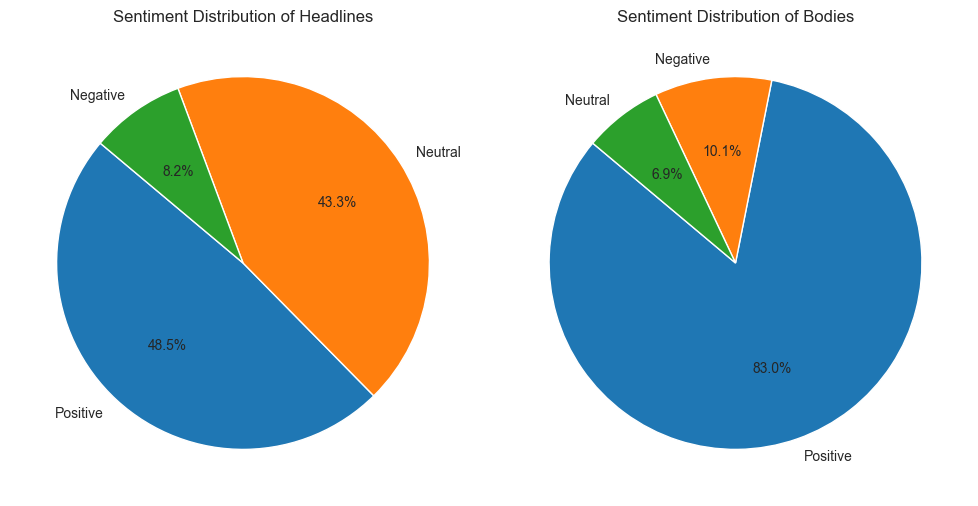

In [11]:
# Apply converting_compound_to_sentiments function to headline_score column
df['sentiments_headline'] = df['headline_score'].apply(lambda x: converting_compound_to_sentiments([x['compound']]))

# Apply converting_compound_to_sentiments function to body_score column
df['sentiments_body'] = df['body_score'].apply(lambda x: converting_compound_to_sentiments([x['compound']]))


# Calculate counts of sentiment labels for headlines
headline_sentiment_counts = df['sentiments_headline'].explode().value_counts()

# Calculate counts of sentiment labels for bodies
body_sentiment_counts = df['sentiments_body'].explode().value_counts()

# Plot pie chart for sentiments of headlines
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(headline_sentiment_counts, labels=headline_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Headlines')

# Plot pie chart for sentiments of bodies
plt.subplot(1, 2, 2)
plt.pie(body_sentiment_counts, labels=body_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Bodies')

plt.tight_layout()
plt.show()



# HELPFUL VOTES

## Selecting Columns

In [ ]:
reviews = df[['text', 'rating', 'helpful_vote']]
reviews.head()

In [ ]:
reviews['helpful_vote'].value_counts()

## Helpful Votes

In [ ]:
# calculate helpful votes for each rating 
helpful_votes = reviews.groupby('rating')['helpful_vote'].sum()

# print helpful votes for each rating
print(helpful_votes)

# print total helpful votes
print(f"Total Helpful Votes: {helpful_votes.sum()}")

# print helpful votes more than 0 for each rating
print(f'Helpful Votes More than 0: ')
print(reviews[reviews['helpful_vote'] > 0].groupby('rating')['helpful_vote'].count())

## Length of Tokens

In [ ]:
# count rows wth rating==5 and length of tokens less than 5
print(f'Number of 5 star reviews with less than 5 words: {reviews[(reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 5)].shape[0]}')

# count rows wth rating==5 and length of tokens less than 6
print(f'Number of 5 star reviews with less than 6 words: {reviews[(reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 6)].shape[0]}')

# count rows wth rating==5 and length of tokens less than 7
print(f'Number of 5 star reviews with less than 7 words: {reviews[(reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 7)].shape[0]}')

# count rows wth rating==5 and length of tokens less than 8
print(f'Number of 5 star reviews with less than 8 words: {reviews[(reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 8)].shape[0]}')

# count rows wth rating==5 and length of tokens less than 9
print(f'Number of 5 star reviews with less than 9 words: {reviews[(reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 9)].shape[0]}')

# count rows wth rating==5 and length of tokens less than 10
print(f'Number of 5 star reviews with less than 10 words: {reviews[(reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 10)].shape[0]}')

In [ ]:
# count unique words in tokens of length less than 5 and with reviews with rating 5
unique_words = set()
for tokens in reviews[(reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 5)]['tokens']:
    unique_words.update(tokens)
print(f'Number of unique words in 5 star reviews with less than 5 words: {len(unique_words)}')


In [ ]:
# drop rows with rating==5 and length of tokens less than or equal to 5
reviews = reviews[~((reviews["rating"] == 5.0) & (reviews["tokens"].str.len() <= 5))]
print(reviews.shape)
reviews.head(10)

In [ ]:
# drop rows with rating==4 and length of tokens less than or equal to 5
reviews = reviews[~((reviews["rating"] == 4.0) & (reviews["tokens"].str.len() <= 5))]
print(reviews.shape)
reviews.head(10)

In [ ]:
reviews['rating'].value_counts()

In [ ]:
# drop rows with counts less than 3 and ratings == 5
reviews = reviews[~((reviews["rating"] == 5.0) & (reviews["tokens"].str.len() < 5))]
reviews['rating'].value_counts()

In [ ]:
# drop rows with ratings==5 and helpful_votes==0
reviews = reviews[~((reviews["rating"] == 5.0) & (reviews["helpful_vote"] == 0))]
reviews['rating'].value_counts()
reviews.shape